<a href="https://colab.research.google.com/github/gdnoon/Coursera_codes/blob/Introduction-to-TensorFlow/FashionLabelling_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf

print(tf.__version__)

2.7.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [7]:
%%capture // hide output of Google colab cell
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics 

1
[[  0   0   0   0   0   0   0   0   0  21 154 135 146 143 101 135 129 126 152  39   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  96 255 253 254 255 232 247 254 254 253 116   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 123 233 216 223 226 230 224 234 217 216 113   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 156 233 227 233 233 225 224 236 225 220 149   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 157 225 228 232 230 222 224 232 227 215 163   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 177 229 224 222 226 222 227 231 228 222 186   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 180 234 216 219 234 233 230 231 215 222 187   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 153 237 210 221 226 181 252 224 216 232 165   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 248 213 223 216  35 255 221 208 239 

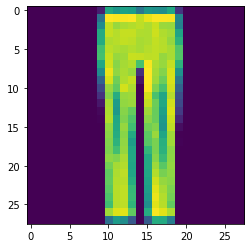

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[511])
print(training_labels[511])
print(training_images[511])

for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping.

In [9]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4986 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8911


loss는 손실함수를 의미합니다. 모델을 훈련시킬때 이 손실 함수를 최소로 만들어주는 가중치들을 찾는 것
반면 metric은 평가지표입니다. 검증셋에서 훈련된 모델의 성능을 평가할 때 어떤 평가지표로 평가할지를 결정해줍니다. 학습곡선을 그릴 때 손실함수와 평가지표를 에포크(epoch)마다 계산한 것을 그려주는데, 손실함수의 추이와 평가지표의 추이를 비교해보면서 모델이 과대적합(overfit) 또는 과소적합(underfit)되고 있는지 여부를 확인할 수 있습니다. 위 예에서는 평가지표로 MAE를 사용했습니다. 중요한 것은 평가지표로 어떤 것을 사용하더라도 모델 가중치의 업데이트에는 영향을 미치지 않는다는 사실입니다. 

**loss: 손실함수. 훈련셋과 연관. 훈련에 사용.**

**metric: 평가지표. 검증셋과 연관. 훈련 과정을 모니터링하는데 사용.**

about 91% accurate - Not great, but not bad considering it was only trained for 5 epochs and done quite quickly. But how would it work with unseen data? 

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3615 - accuracy: 0.8693


[0.3614906370639801, 0.8693000078201294]

**Exercise** :

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1865/1875 [============================>.] - ETA: 0s - loss: 0.4735 - accuracy: 0.8300
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4728 - accuracy: 0.8303
